In [1]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
import math

def f(X):
    """Keane's Bump function.
    n = dimension of the domain
    x = vector in the domain"""
    cos4 = 0
    cos2 = 1
    x_i = 0
    n = len(X)
    for i in range(n):
        cos4 += math.cos(X[i])**4
        cos2 *= math.cos(X[i])**2
        x_i += (i+1)*(X[i]**2)
    if x_i == 0:
        answer = None
    else:
        answer = np.abs((cos4 - 2*cos2)/math.sqrt(x_i))
    ## we are turning the maximization problem into a minimization problem
    objective = -1 * answer
    ## we are adding a penalty for the constraint if either is violated!
    if np.sum(X) > 15 * len(X) / 2 or np.prod(X) < 0.75:
        ## penalty has to be larger than objective function value
        penalty = 2
    else:
        penalty = 0
    return objective + penalty

## 8D case
n = 8

varbound=np.array([[0,10]]*n)

In [3]:
mutation_prob = [0.01, 0.05, 0.1, 0.3, 0.5]
population_size = [50, 100, 150, 200, 400]

def run_ensemble(algorithm_param):
    best_sols = []
    for i in range(25):
        model=ga(function=f,dimension=n,variable_type='real',variable_boundaries=varbound, algorithm_parameters=algorithm_param)
        model.run()
        solution=model.output_dict
        best_sols.append(solution['function'])
    return np.average(best_sols)


results = []
for m in mutation_prob:
    for p in population_size:
        algorithm_param = {'max_num_iteration': 10000,\
                   'population_size':p,\
                   'mutation_probability':m,\
                   'elit_ratio': 0,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':1000, \
                    'convergence_curve': False}
        best_sol = run_ensemble(algorithm_param)
        results.append([m, p, best_sol])
print(results)

In [43]:
results_final = [[0.01, 50, -0.4004237218177309], [0.01, 100, -0.4759090905098146], [0.01, 150, -0.5595274436640876], [0.01, 200, -0.5799946920785863], [0.01, 400, -0.6522592327537856], [0.05, 50, -0.43234305948357316], [0.05, 100, -0.4818870049012324], [0.05, 150, -0.5043575312030794], [0.05, 200, -0.5208417277917112], [0.05, 400, -0.5193459530659676], [0.1, 50, -0.4548697883137426], [0.1, 100, -0.45573023830946446], [0.1, 150, -0.48466581076945714], [0.1, 200, -0.4992820940925277], [0.1, 400, -0.4791705526264519], [0.3, 50, -0.41912019520682164], [0.3, 100, -0.4261487522116325], [0.3, 150, -0.42236655467176626], [0.3, 200, -0.4290229691114244], [0.3, 400, -0.4430780963391573], [0.5, 50, -0.39146150461317614], [0.5, 100, -0.4065809830509541], [0.5, 150, -0.41440885822412116], [0.5, 200, -0.4211265674745791], [0.5, 400, -0.4492366947453796]]

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



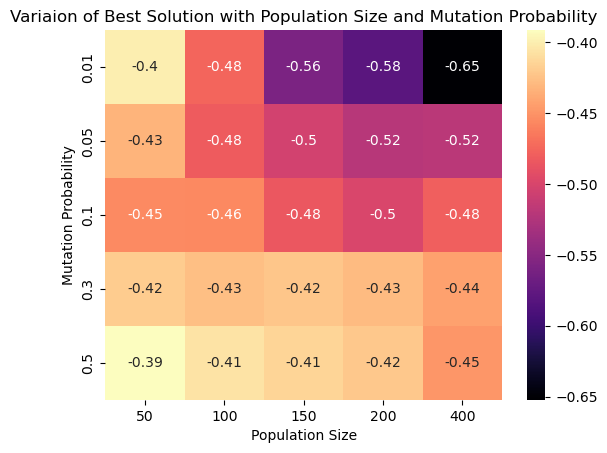

In [46]:
# Extracting data
m = [r[0] for r in results_final]
N = [r[1] for r in results_final]
best_sol = [r[2] for r in results_final]

# Create a dataframe from the lists
df_heatmap = pd.DataFrame({'m': m, 'N': N, 'best_sol': best_sol})

# Pivot the dataframe to create a matrix for the heatmap
df_pivot = df_heatmap.pivot(index='m', columns='N', values='best_sol')

# Create the heatmap
sns.heatmap(df_pivot, annot=True, cmap='magma')

# Set the labels and title
plt.xlabel('Population Size')
plt.ylabel('Mutation Probability')
plt.title('Variaion of Best Solution with Population Size and Mutation Probability')

# Show the plot
plt.show()